In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from pandas import DataFrame as pd

import tensorflow as tf
import time

In [10]:
def centresSetting(df, centres):
    """Принимает исходные данные (Pandas DataFrame) и количество кластеров,\n
        возвращает установленные случайным образом центры кластеров (Pandas DataFrame)"""
    centroids = pd({
        "x": [np.random.randint(np.max(df["x"])) / 1 for i in range(centres)],
        "y": [np.random.randint(np.max(df["y"])) / 1 for i in range(centres)]
    })
    return centroids 
    

def setWorkList(df, centres):
    """Принимает исходные данные и установленные центры кластеров (Pandas DataFrame),\n
       возвращает Pandas DataFrame с вычисленными расстояними до центра кластера и\n
       принадлежностью к кластеру"""
    workList = pd({
        "x": [df["x"][i] for i in range(len(df))],
        "y": [df["y"][i] for i in range(len(df))] 
    })
    
    for i in range(len(centres)):
        workList[f"distFrom{i}"] = (
            np.sqrt(
                (df["x"] - centres["x"][i]) ** 2 
                + (df["y"] - centres["y"][i]) ** 2
        )
    )
    workList["minrange"] = [np.min(workList.loc[s, f"distFrom{0}":f"distFrom{len(centres) - 1}"]) \
                            for s in range(len(workList))]
    workList["closest"] = [np.where(((workList.loc[i, f"distFrom{0}":f"distFrom{len(centres) - 1}"]) == \
                           workList.loc[i, "minrange"]).to_numpy().astype(np.int8) == 1)[-1][-1] \
                           for i in range(len(workList))]
    return workList


def plotCentresAndWorklist(w, c):
    """Принимает результаты setWorkList(df, centres) и centresSetting(df, centres),\n
       возвращает график matplotlib.pyplot с изображением результатов"""
    colrs = list(colors.BASE_COLORS.keys())
    if not w.empty:
        for i in range(len(w)):
            plt.plot(w["x"][i], w["y"][i], colrs[w['closest'][i]]+"x")
    if not c.empty:
        for i in range(len(c)):
            plt.plot(c["x"][i], c["y"][i], colrs[i]+"o")
    return plt.show()    


def updateCentroids(df, centroids):
    """Принимает результаты setWorkList(df, centres) и centresSetting(df, centres),\n
       возвращает обновлённые с их учётом центры кластеров (Pandas DataFrame)"""
    oldCentroids = pd.copy(centroids)
    for i in range(len(centroids)):
        centroids["x"][i] = np.mean(df[df["closest"] == i]["x"])
        centroids["y"][i] = np.mean(df[df["closest"] == i]["y"])
    return centroids, oldCentroids


def main(df, centres):
    """Полный цикл преобразований\n
       Принимает исходные данные и количество центров кластеров\n
       Возвращает объекты Pandas DataFrame: с рассчитываемыми параметрами,\n
       центры кластеров, полученные на (i, i - 1) итерациях и количество итераций"""
    initialCentroids = centresSetting(df = df, centres = centres)
    workList = setWorkList(df = df, centres = initialCentroids)
    newCentroids, oldCentroids = updateCentroids(df = workList, centroids = initialCentroids)

    iters = 0
    while True:
        workList = setWorkList(df = workList, centres = newCentroids)
        newCentroids, oldCentroids = updateCentroids(df = workList, centroids = newCentroids)
        iters += 1
        if newCentroids.equals(oldCentroids):
            return workList, newCentroids, oldCentroids, iters

1. Исходные данные

In [3]:
dots = np.array([
    [2, 3, 1, 2, 4, 1, 3, 5, 4, 3, 6, 5, 9, 11, 13, 14, 15, 15, 15, 16, 17, 14, 13, 17, 16, 17, 15, 14, 15, 14, 14, 14, 14, 16, 17, 18, 16, 16, 19, 21, 22, 23, 21, 22, 24, 22, 20], \
    [15, 15, 14, 13, 13, 12, 11, 12, 10, 7, 7, 5, 11, 13, 15, 15, 16, 13, 15, 16, 17, 17, 17, 14, 13, 11, 10, 7, 6, 6, 5, 4, 1, 5, 5, 4, 4, 2, 3, 6, 6, 6, 7, 7, 7, 8, 6]
    ])
dfDots = pd({
    "x" : dots[0],
    "y" : dots[1]
    })

2. Центры кластеров устанавливаются случайным образом

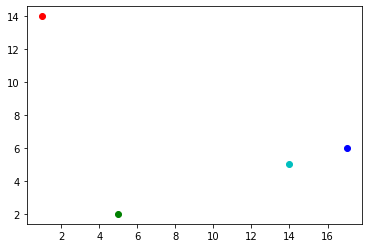

In [43]:
centres = centresSetting(df = dfDots, centres = 4)
plotCentresAndWorklist(w = pd(columns=["pass"]), c = centres)

3. Для каждой исходной объекта определяется принадлежность к кластеру

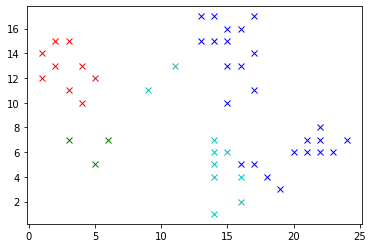

In [44]:
workList = setWorkList(df = dfDots, centres = centres)
plotCentresAndWorklist(w = workList, c = pd(columns=["pass"]))

4. Обновление центров кластеров на основании средних значений объектов, принадлежащих кластеру

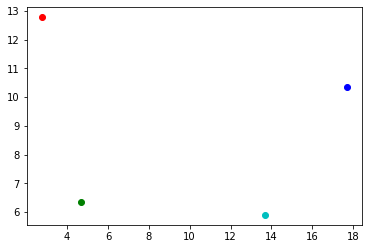

In [45]:
newCentres, oldCentres = updateCentroids(df = workList, centroids = centres)
plotCentresAndWorklist(w = pd(columns=["pass"]), c = newCentres)

5. Полный цикл преобразований 

Обновлённые центры кластеров:
            x          y
0   2.625000  13.125000
1  14.857143  14.428571
2  18.100000   5.250000
3   5.400000   8.000000
Центры кластеров на предыдущей итерации:
            x          y
0   2.625000  13.125000
1  14.857143  14.428571
2  18.100000   5.250000
3   5.400000   8.000000
Количество итераций: 4


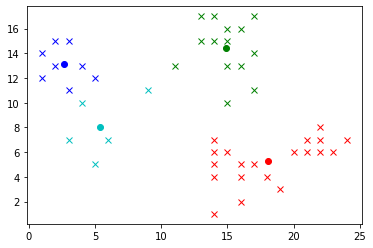

In [46]:
workList, centroids, oldcentroids, iters = main(df = dfDots, centres = 4)
print("Обновлённые центры кластеров:\n", centroids)
print("Центры кластеров на предыдущей итерации:\n", oldcentroids)
print("Количество итераций:", iters)
plotCentresAndWorklist(w = workList, c = centroids)

6. Адаптация https://habr.com/ru/post/334810/ для tensorflow 2.6

In [34]:
tf.compat.v1.disable_eager_execution()


class SOMNetwork():
	def __init__(self, input_dim, dim=10, sigma=None, learning_rate=0.1, tay2=1000, dtype=tf.float32):
		if not sigma:
			sigma = dim / 2
		self.dtype = dtype
		#constants
		self.dim = tf.constant(dim, dtype=tf.int64)
		self.learning_rate = tf.constant(learning_rate, dtype=dtype, name='learning_rate')
		self.sigma = tf.constant(sigma, dtype=dtype, name='sigma')
		self.tay1 = tf.constant(1000/np.log(sigma), dtype=dtype, name='tay1')
		self.minsigma = tf.constant(sigma * np.exp(-1000/(1000/np.log(sigma))), dtype=dtype, name='min_sigma')
		self.tay2 = tf.constant(tay2, dtype=dtype, name='tay2')
		self.minlr = tf.constant(0.01, dtype=self.dtype, name='min_learning_rate')
		#input vector
		self.x = tf.compat.v1.placeholder(dtype=dtype, shape=[input_dim], name='input')
		#iteration number
		self.n = tf.compat.v1.placeholder(dtype=dtype, name='iteration')
		#variables
		self.w = tf.Variable(tf.random.uniform([dim*dim, input_dim], minval=-1, maxval=1, dtype=dtype),
			dtype=dtype, name='weights')
		#helper
		self.positions = tf.where(tf.fill([dim, dim], True))


	def feed(self, input):
		init = tf.compat.v1.global_variables_initializer()
		with tf.Session() as sess:
			init.run()
			win_index = sess.run(self.__competition(), feed_dict={self.x: input})
			win_index_2d = np.array([win_index//self.dim.eval(), win_index-win_index//self.dim.eval()*self.dim.eval()])
		return win_index_2d


	def training_op(self):
		win_index = self.__competition('train_')
		with tf.name_scope('cooperation') as scope:
			coop_dist = tf.sqrt(tf.reduce_sum(tf.square(tf.cast(self.positions -
				[win_index//self.dim, win_index-win_index//self.dim*self.dim], 
				dtype=self.dtype)), axis=1))
			sigma = tf.cond(self.n > 1000, lambda: self.minsigma, lambda: self.sigma * tf.exp(-self.n/self.tay1))
			# sigma_summary = tf.summary.scalar('Sigma', sigma)
			tnh = tf.exp(-tf.square(coop_dist) / (2 * tf.square(sigma))) # topological neighbourhood
		with tf.name_scope('adaptation') as scope:
			lr = self.learning_rate * tf.exp(-self.n/self.tay2)
			minlr = self.minlr
			lr = tf.cond(lr <= minlr, lambda: minlr, lambda: lr)
			# lr_summary = tf.summary.scalar('Learning rate', lr)
			delta = tf.transpose(lr * tnh * tf.transpose(self.x - self.w))
			training_op = tf.compat.v1.assign(self.w, self.w + delta)
		return training_op #, lr_summary #, sigma_summary


	def __competition(self, info=''):
		with tf.name_scope(info+'competition') as scope:
			distance = tf.sqrt(tf.reduce_sum(tf.square(self.x - self.w), axis=1))
		return tf.argmin(distance, axis=0)


def test_som_with_color_data(som_dim = 20):
	som = SOMNetwork(input_dim=3, dim=som_dim, dtype=tf.float64, sigma=3)
	test_data = np.random.uniform(0, 0.99, (250000, 3))
	print(test_data)
	training_op = som.training_op()
	init = tf.compat.v1.global_variables_initializer()
	writer = tf.compat.v1.summary.FileWriter('./logs/', tf.compat.v1.get_default_graph())
	with tf.compat.v1.Session() as sess:
		init.run()
		img1 = tf.reshape(som.w, [som_dim,som_dim,-1]).eval()
		plt.figure(1)
		plt.subplot(121)
		plt.imshow(img1)
		start = time.time()
		for i, color_data in enumerate(test_data):
			if i % 1000 == 0:
				print('iter:', i)
			sess.run(training_op, feed_dict={som.x: color_data, som.n:i})
		end = time.time()
		print(end - start)
		img2 = tf.reshape(som.w, [som_dim,som_dim,-1]).eval()
		plt.subplot(122)
		plt.imshow(img2)
	writer.close()
	plt.show()		

[[0.59152106 0.86702345 0.22808455]
 [0.59671137 0.44645781 0.39553317]
 [0.98686822 0.50077521 0.30576489]
 ...
 [0.1214267  0.49215686 0.28690023]
 [0.17550359 0.48166607 0.26947995]
 [0.38625638 0.06672542 0.55827721]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter: 0
iter: 1000
iter: 2000
iter: 3000
iter: 4000
iter: 5000
iter: 6000
iter: 7000
iter: 8000
iter: 9000
iter: 10000
iter: 11000
iter: 12000
iter: 13000
iter: 14000
iter: 15000
iter: 16000
iter: 17000
iter: 18000
iter: 19000
iter: 20000
iter: 21000
iter: 22000
iter: 23000
iter: 24000
iter: 25000
iter: 26000
iter: 27000
iter: 28000
iter: 29000
iter: 30000
iter: 31000
iter: 32000
iter: 33000
iter: 34000
iter: 35000
iter: 36000
iter: 37000
iter: 38000
iter: 39000
iter: 40000
iter: 41000
iter: 42000
iter: 43000
iter: 44000
iter: 45000
iter: 46000
iter: 47000
iter: 48000
iter: 49000
iter: 50000
iter: 51000
iter: 52000
iter: 53000
iter: 54000
iter: 55000
iter: 56000
iter: 57000
iter: 58000
iter: 59000
iter: 60000
iter: 61000
iter: 62000
iter: 63000
iter: 64000
iter: 65000
iter: 66000
iter: 67000
iter: 68000
iter: 69000
iter: 70000
iter: 71000
iter: 72000
iter: 73000
iter: 74000
iter: 75000
iter: 76000
iter: 77000
iter: 78000
iter: 79000
iter: 80000
iter: 81000
iter: 82000
iter: 83000
iter:

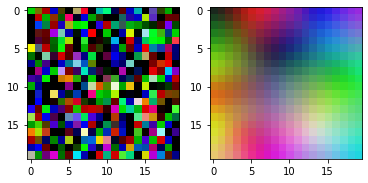

In [32]:
test_som_with_color_data(som_dim = 20)

[[0.35141234 0.67489897 0.29023762]
 [0.09169464 0.29063393 0.02282597]
 [0.9139203  0.81091619 0.55466903]
 ...
 [0.82011314 0.57670314 0.62979871]
 [0.68082431 0.87023812 0.88966476]
 [0.16401231 0.74234074 0.445695  ]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


iter: 0
iter: 1000
iter: 2000
iter: 3000
iter: 4000
iter: 5000
iter: 6000
iter: 7000
iter: 8000
iter: 9000
iter: 10000
iter: 11000
iter: 12000
iter: 13000
iter: 14000
iter: 15000
iter: 16000
iter: 17000
iter: 18000
iter: 19000
iter: 20000
iter: 21000
iter: 22000
iter: 23000
iter: 24000
iter: 25000
iter: 26000
iter: 27000
iter: 28000
iter: 29000
iter: 30000
iter: 31000
iter: 32000
iter: 33000
iter: 34000
iter: 35000
iter: 36000
iter: 37000
iter: 38000
iter: 39000
iter: 40000
iter: 41000
iter: 42000
iter: 43000
iter: 44000
iter: 45000
iter: 46000
iter: 47000
iter: 48000
iter: 49000
iter: 50000
iter: 51000
iter: 52000
iter: 53000
iter: 54000
iter: 55000
iter: 56000
iter: 57000
iter: 58000
iter: 59000
iter: 60000
iter: 61000
iter: 62000
iter: 63000
iter: 64000
iter: 65000
iter: 66000
iter: 67000
iter: 68000
iter: 69000
iter: 70000
iter: 71000
iter: 72000
iter: 73000
iter: 74000
iter: 75000
iter: 76000
iter: 77000
iter: 78000
iter: 79000
iter: 80000
iter: 81000
iter: 82000
iter: 83000
iter:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


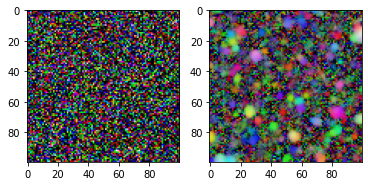

In [35]:
 test_som_with_color_data(som_dim = 100)